# Лабораторная работа №3. Курс: прикладная математика. Авторы: Ярослав Ведерников и Никита Хауров. Группа: М33011.

## Цепи Маркова. Дискретные цепи Маркова. Эргодические цепи Маркова.

## Задачи

- придумать эргодическую марковскую цепь 8 x 8
- промоделировать марковскую цепь пошагово с двумя разными начальными векторами вероятностей состояний и получить два конечных вектора
- решить задачу аналитически и получить вектор
- проверить, что результаты совпадают

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

# Ход работы

### Метод для рисования графиков

In [54]:
def plot_graph(dataset, method_name):
    plt.figure(figsize=(11, 5))
    plt.title('График изменения СКО (метод {})'.format(method_name))
    plt.xlabel('Шаг')
    plt.ylabel('Среднеквадратичное отклонение')
    plt.plot(*zip(*dataset))
    plt.show()

### Численное моделирование на ```steps``` шагов

In [55]:
def model_n_steps(matrix: np.array, current_state: np.array, steps: int):
    graph = []
    transposed = np.transpose(matrix)
    for step in range(steps):
        previous_state = current_state
        current_state = np.dot(transposed, current_state)
        graph.append((step, mean_squared_error(current_state, previous_state)))
    return (current_state, graph)

### Численное моделирование с точностью до ```accuracy```

In [56]:
def model_accuracy(matrix: np.array, current_state: np.array, accuracy: float):
    graph = []
    transposed = np.transpose(matrix)
    mse = float('inf')
    while mse > accuracy:
        previous_state = current_state
        current_state = np.dot(transposed, current_state)
        mse = mean_squared_error(current_state, previous_state)
        graph.append((len(graph), mse))
    return (current_state, graph)

### Аналитическое решение с помощью матричного уравнения ```AX=B```

In [57]:
def solve_analysis(matrix: np.array):
    a, b = compose_equation(matrix)
    x_short = np.linalg.inv(a).dot(b)  # находятся все иксы, кроме последнего
    sum_of_x = np.sum(x_short)  # считается сумма всех иксов, кроме последнего
    return np.append(x_short, 1 - sum_of_x)  # последний икс находим как разность единицы и суммы всех остальных
    

def compose_equation(matrix: np.array):  # составляется матрица А и вектор B
    last_variable = matrix.shape[0] - 1
    a = np.empty((matrix.shape[0], matrix.shape[0]))
    for i in range(matrix.shape[0]):
        subtractor = np.zeros((1, matrix.shape[0]))
        subtractor[0, i] = 1
        a[i] = matrix[:, i] - subtractor - matrix[last_variable][i]
    a = np.delete(a, last_variable, axis=0)
    a = np.delete(a, last_variable, axis=1)
    return (a, np.array([-matrix[last_variable][col] for col in range(matrix.shape[0] - 1)]))

## Использование методов

Создадим матрицу переходов

In [58]:
markov = np.array([[0.1754386, 0.0877193, 0.36842105, 0.0877193, 0.05263158, 0.01754386, 0.1754386, 0.03508772],
                   [0.07971014, 0.05797101, 0.14492754, 0.15217391, 0.0942029, 0.22463768, 0.13768116, 0.10869565],
                   [0.01020408, 0.12244898, 0.17346939, 0.17346939, 0.23469388, 0.03061224, 0.10204082, 0.15306122],
                   [0.07142857, 0.17857143, 0.10714286, 0.22321429, 0.22321429, 0.16964286, 0.00892857, 0.01785714],
                   [0.1, 0.11666667, 0.03333333, 0.1, 0.1, 0.2, 0.16666667, 0.18333333],
                   [0.10619469, 0.07964602, 0.18584071, 0.10619469, 0.08849558, 0.05309735, 0.17699115, 0.20353982],
                   [0.21212121, 0.12121212, 0.1010101,  0.03030303, 0.01010101, 0.25252525, 0.25252525, 0.02020202],
                   [0.02439024, 0.32520325, 0.01626016, 0.07317073, 0.14634146, 0.15447154, 0.16260163, 0.09756098]])

### Инициализируем первое исходное состояние, зададим параметры остановки и проведем тест

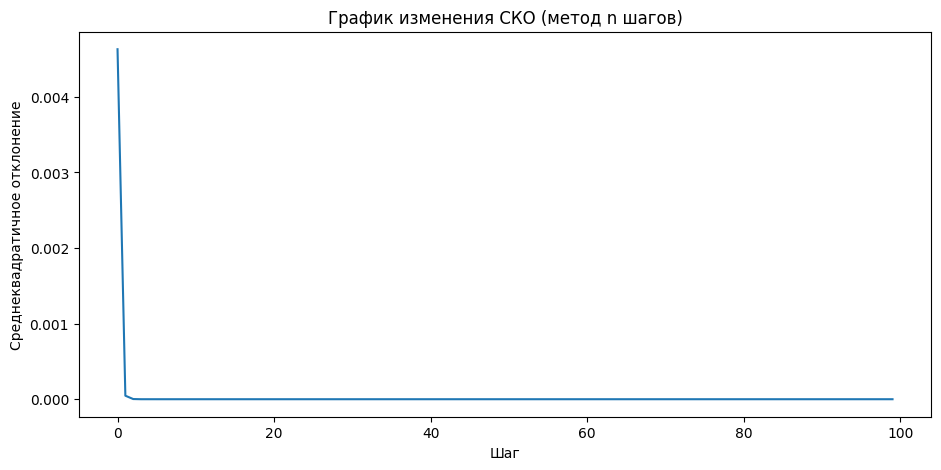

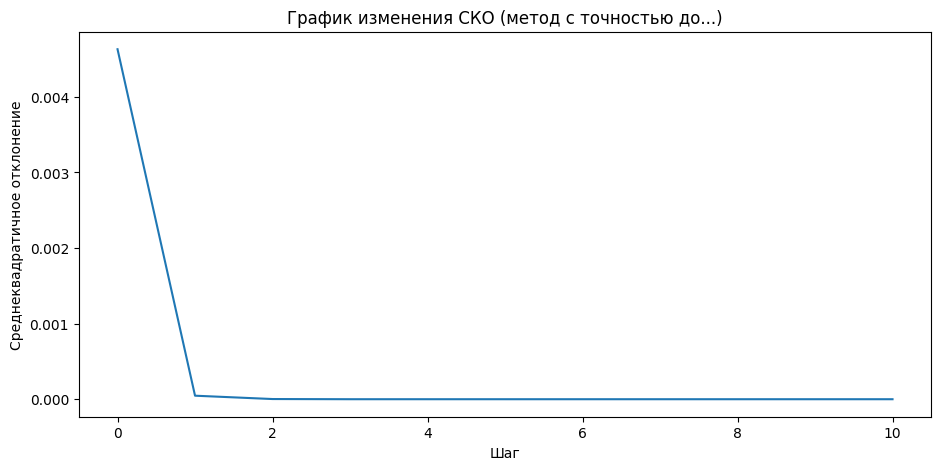

Результаты:
[0.09870376 0.13148233 0.13908688 0.11801743 0.11757873 0.14055962
 0.15002402 0.1045472 ]
[0.09870376 0.13148233 0.13908688 0.11801744 0.11757873 0.14055962
 0.15002402 0.10454721]
[0.09870376 0.13148233 0.13908688 0.11801744 0.11757873 0.14055962
 0.15002402 0.10454721]


In [59]:
first = np.array([0.2, 0.1, 0.15, 0.11, 0.24, 0.05, 0.1, 0.05])
max_steps, accuracy = 100, 1 / (10 ** (18))
steps_results = model_n_steps(markov, first, max_steps)
accuracy_results = model_accuracy(markov, first, accuracy)
plot_graph(steps_results[1], "n шагов")
plot_graph(accuracy_results[1], "с точностью до...")
analytic_result = solve_analysis(markov)

print("Результаты:", steps_results[0], accuracy_results[0], analytic_result, sep='\n')

Результаты схожи, значит методы реализованы правильно

### Инициализируем второе исходное состояние, зададим параметры остановки и проведем тест

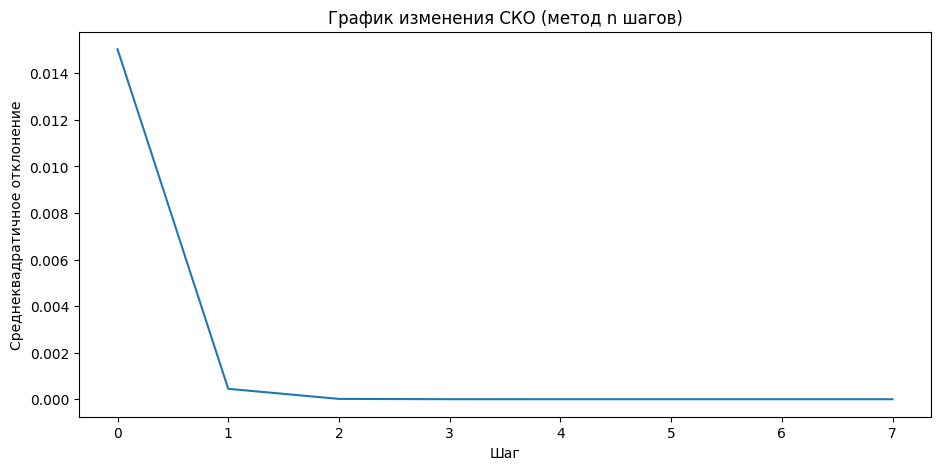

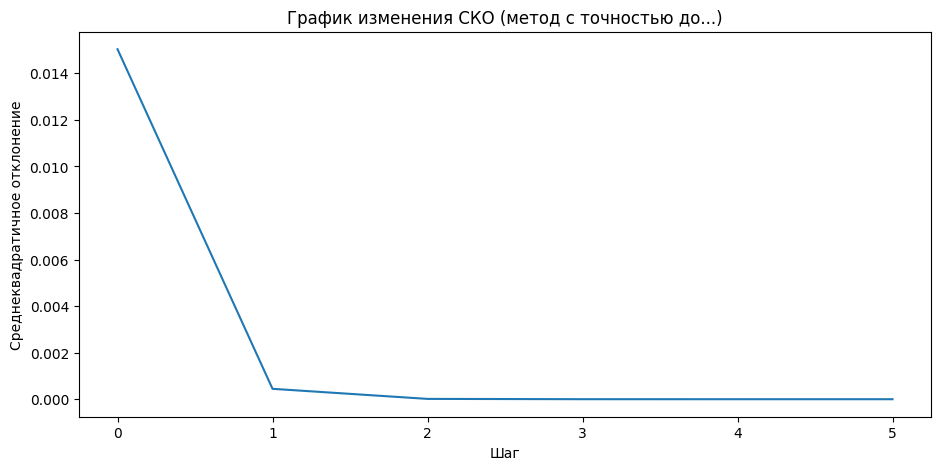

Результаты:
[0.09870387 0.13148234 0.13908721 0.11801731 0.11757866 0.14055936
 0.15002417 0.10454708]
[0.0987037  0.13148749 0.1390806  0.11801502 0.11757362 0.14056685
 0.15002555 0.10454717]
[0.09870376 0.13148233 0.13908688 0.11801744 0.11757873 0.14055962
 0.15002402 0.10454721]


In [60]:
second = np.array([0, 0.25, 0.25, 0.25, 0, 0, 0.25, 0])
max_steps, accuracy = 8, 1 / (10 ** (8))
steps_results = model_n_steps(markov, second, max_steps)
accuracy_results = model_accuracy(markov, second, accuracy)
plot_graph(steps_results[1], "n шагов")
plot_graph(accuracy_results[1], "с точностью до...")

print("Результаты:", steps_results[0], accuracy_results[0], analytic_result, sep='\n')

## Вывод

В лабораторной работе были исследованы эргодические цепи Маркова. Найти стационарное состояние в этих цепях можно несколькими способами: численными и аналитическим. Были написаны реализации решений и проведено сравнение результатов. Все результаты очень близки по значению, значит, результата удалось успешно добиться.